<a href="https://colab.research.google.com/github/kunalburgul/MLDS_Learning/blob/master/Tensorflow/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow 

There are many definations for a regression problem but tin our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow 
import tensorflow as tf
print(tf.__version__)

2.4.1


## Creating some data to view and fit 

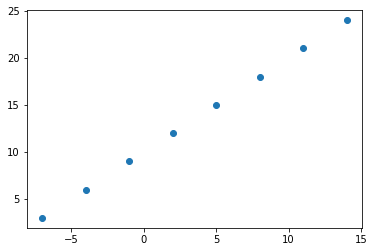

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visulalize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
housr_price = tf.constant([939700])
house_info, housr_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
 # Turn out the NumPy arrays into the tensors
 X = tf.constant(X)
 y = tf.constant(y)
 X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Start with the modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of the deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how worng it is) and the optimizer  (tells our model how to improve the patterns its learnings) and the evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find the patterns between X & y (features and labels)

In [9]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using a Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Complie the model 
model.compile(loss=tf.keras.losses.mae,  # mae - mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD - stochastic gradient desent
              metrics=["mae"])

# 3. Fit the model 
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 526ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [10]:
# Check out X an y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [12]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve  out model by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (all called neuraons) within each of the hidden layers, change the activation function of each layer.
2. **Compling a model** - Here we might change the aptimization function or perhaps the **;eraning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **ephocs** (leave it traning for longer) or on more data (give the model more examples to learn form). 


-----------------------------------------------------------------------

Here are some of the common ways to improve the deep model

- Adding layers
- Increase the number of hidden units
- Change the activation functions 
- Change the optimization functions.
- Change the learning Rate.
- Fitting on more data

------------------------------------------------------------------------

In [13]:
# Let's rebuild our model

# 1. Create the model 
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = "mae")

# 3. Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 225ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 5m

In [14]:
# Remind  ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
# Let's see if our models prediction has imporved 
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [16]:
# Let's see if we can make another to imoprove our model

# 1. Create the model  (this time with the extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

# 2. Compile the model 
model.compile(loss = "mae", 
              optimizer = tf.keras.optimizers.Adam(lr=0.01),
              metrics = "mae")

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 361ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9961 - mae: 8.9961
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1346 - mae: 8.1346
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4052 - mae: 7.4052
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 5.9140 - mae: 5.9140
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 5.1124 - mae: 5.1124
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss:

***Note***: *The learning rate is the most important parameter of the many different neural networks.*



In [17]:
# Let's remind  ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [18]:
# Let's try to make the prediction
model.predict([17.0])

array([[27.159252]], dtype=float32)

## Evaluating a model

In a practice, a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it --> evaulate it --> tweak a model --> fit it --> evaluate it --> tweak a model --> fit it --> evaluate it...
```

When it comes to evalution... there are 3 words you should memorize":

> "Visualize, visualize, visualize"

It's a good idea to visualize:

- **The data** - What data are we working with? What does it look like?
-**The model itself** - What does our model look like?
- **The training model** - How does a model performs while it lears?
- **The predictions** - How do the predictions of a model line up against the ground truth (the original labels)?


In [19]:
# Make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
# Make the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

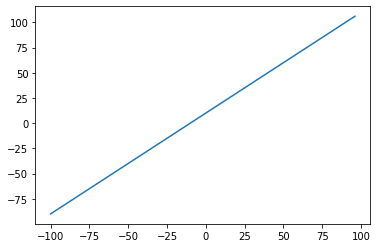

In [21]:
# Visualize the data
import matplotlib.pyplot as plt
plt.plot(X, y)

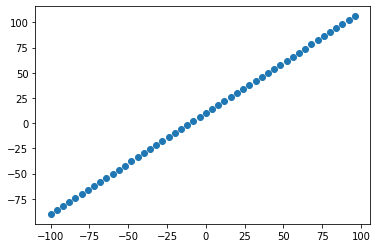

In [22]:
plt.scatter(X, y)

### The 3 sets

- **Training set** - The model learns on this data, which is typically 70-80% of the total data you have available.
- **Validation set** - The model get tuned in this data which is typically 10-15% of the data available.
- **Test set** - The model get evaluated in the data to test what is has learned, this set is typically 10-15% of the total data available.



In [23]:
# Chec k the length of the no.of samples we have
len(X)

50

In [24]:
# Split the data into train and test set
X_train = X[:40] # First 40 are training samples (80% of the data)
y_train = y[:40]
X_test = X[40:] # Last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

 ## Visualing the data

 Now we've got our data in the training and test sets... let's visualize it again!

<function matplotlib.pyplot.legend>

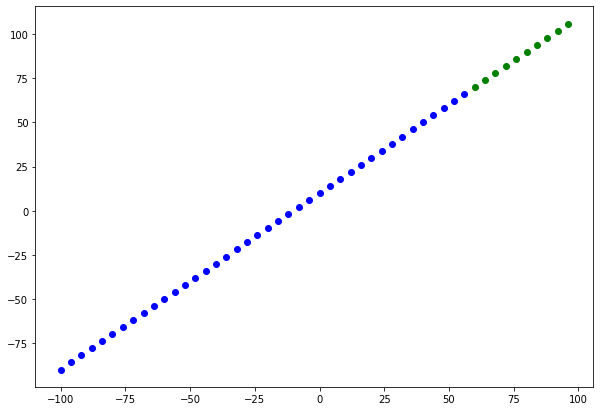

In [25]:
plt.figure(figsize=(10, 7))
# Plotting the training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data') # our model will learn on this 
# Plotting the test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data') # want our model to be able to predict this (given X, what's y)
# Shoe a leged
plt.legend

In [26]:
# Let's have look at how to built a neural network.

# 1. Create a model 
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Complie the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model
  

In [27]:
model.summary()

ValueError: ignored

In [28]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer 
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name='output_layer'),], 
    name="model_1")

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [29]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


- **Total params** - Total number of parameters in the model.
- **Trainabel params** - Theses are the parameters (patterns) that model can update as it trains.
- **Non-trainable params** - These parameters aren't updated during training (this is typical when you bring in alredy learned patterns or parameters from other models during transfer learning).

**Resource:**  Also don't forget to check out the MIT's [Introdcution to Deep Learning course](http://introtodeeplearning.com/).

In [30]:
# Let's fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 26.8627 - mae: 26.8627
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.4175 - mae: 24.4175
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 31.5187 - mae: 31.5187
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8490 - mae: 27.8490
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.6465 - mae: 14.6465
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 11.9682 - mae: 11.9682
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0874 - mae: 11.0874
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.3978 - mae: 11.3978
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 42.4087 - mae: 42.4087
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 28.3537 - mae: 28.3537
Epoch 11/100
2/2 [==============================] - 0s 5ms/

**Exercise:** Try playing around with the number of hidden parameters in the dense layer, see how that effects the number of parameters (total and traunable) by calling `model.summary()`.

In [31]:
# Get ta summary of put model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


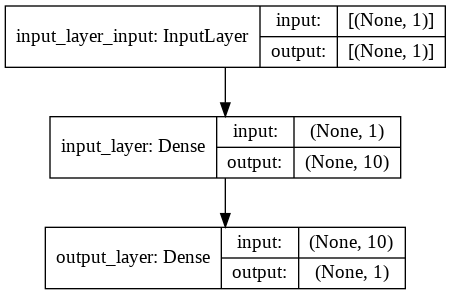

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visulaizing on model prediction

To visualize predicitons, it's a good to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` vs `y_pred` (ground truth versus model predictions)

In [33]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred  

array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)

In [34]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

***Note:*** *If we feel like that we are going to reuse some kinf og the functinality in the future, it's a good idea to turn it into a function*

In [35]:
# Let's create a plotting function
def plot_predictions(train_data,train_labels,
                     test_data, test_labels,
                     predictions):
    """
    Plot the training data, test data and compare the predictions to the ground truth labels.
    """

    plt.figure(figsize=(10,7))
    # Plot the training data in blue
    plt.scatter(train_data, train_labels, c='b', label="Training Data") 
    # Plot the testing data in green
    plt.scatter(test_data, test_labels, c='g', label="Testing Data")
    # Plot models predictions in red
    plt.scatter(test_data,predictions, c='r', label="Predictions")
    # Show Legends
    plt.legend()

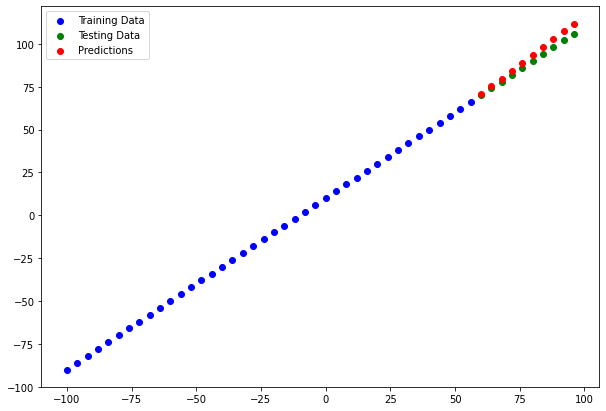

In [36]:
plot_predictions(train_data=X_train, 
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating the model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrcs to evaluate your model's performance .

Since we're working on the regression problem, two of the main metrics: 
- **MAE** - Mean Absolute Error, "on average, how wrong is each of my model's prediction's"
- **MSE** - Mean Square Error, "square the average errors"

![Regression_metrics](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRz38Oc0rMm0APuLWgR-9Sc91ULC03ffPdCgNEIqAAr91nrJJaZRKrVgpMyQ0uqG9ocLVY&usqp=CAU)


- **Huber** - "Combination of MSE and MAE, less sensative to outliers than MSE."

In [37]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 125ms/step - loss: 3.1970 - mae: 3.1970


[3.1969642639160156, 3.1969642639160156]

In [38]:
# Calculate the MAE(mean absolute error) 
# mae_error = tf.keras.losses.MAE(y_test, y_pred)
ma_error = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
ma_error

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558233, 14.116046, 11.708939, 10.336925, 10.      , 10.698164,
       12.447131, 15.33302 , 19.254005, 23.841728], dtype=float32)>

In [39]:
y_test-y_pred

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,   4,   8,  12,  16,  20,  24,  28,  32,  36],
       [ -5,  -1,   3,   7,  11,  15,  19,  23,  27,  31],
       [ -9,  -5,  -1,   3,   7,  11,  15,  19,  23,  27],
       [-14, -10,  -6,  -2,   2,   6,  10,  14,  18,  22],
       [-18, -14, -10,  -6,  -2,   2,   6,  10,  14,  18],
       [-23, -19, -15, -11,  -7,  -3,   1,   5,   9,  13],
       [-28, -24, -20, -16, -12,  -8,  -4,   0,   4,   8],
       [-32, -28, -24, -20, -16, -12,  -8,  -4,   0,   4],
       [-37, -33, -29, -25, -21, -17, -13,  -9,  -5,  -1],
       [-41, -37, -33, -29, -25, -21, -17, -13,  -9,  -5]], dtype=int32)>

In [40]:
y_pred-y_test

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[  0,  -4,  -8, -12, -16, -20, -24, -28, -32, -36],
       [  5,   1,  -3,  -7, -11, -15, -19, -23, -27, -31],
       [  9,   5,   1,  -3,  -7, -11, -15, -19, -23, -27],
       [ 14,  10,   6,   2,  -2,  -6, -10, -14, -18, -22],
       [ 18,  14,  10,   6,   2,  -2,  -6, -10, -14, -18],
       [ 23,  19,  15,  11,   7,   3,  -1,  -5,  -9, -13],
       [ 28,  24,  20,  16,  12,   8,   4,   0,  -4,  -8],
       [ 32,  28,  24,  20,  16,  12,   8,   4,   0,  -4],
       [ 37,  33,  29,  25,  21,  17,  13,   9,   5,   1],
       [ 41,  37,  33,  29,  25,  21,  17,  13,   9,   5]], dtype=int32)>

In [41]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55221 ],
       [ 75.13992 ],
       [ 79.72765 ],
       [ 84.31538 ],
       [ 88.9031  ],
       [ 93.49082 ],
       [ 98.07855 ],
       [102.666275],
       [107.254005],
       [111.84173 ]], dtype=float32)>

In [42]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55221 ,  75.13992 ,  79.72765 ,  84.31538 ,  88.9031  ,
        93.49082 ,  98.07855 , 102.666275, 107.254005, 111.84173 ],
      dtype=float32)>

In [44]:
y_pred.shape, y_test.shape

((10, 1), TensorShape([10]))

In [45]:
# Calculate the mean absolute error
ma_error = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
ma_error

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969643>

In [46]:
y_pred.shape

(10, 1)

In [47]:
# Now let's calculate the mean squate error
ms_error = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
ms_error

<tf.Tensor: shape=(), dtype=float32, numpy=13.0703>

In [48]:
# Let's check out the huber metric also
huber_error = tf.keras.losses.huber(y_true=y_test, y_pred=tf.squeeze(y_pred))
huber_error

<tf.Tensor: shape=(), dtype=float32, numpy=2.70699>

In [49]:
# Let's make some functions to use the MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running the experiments to improve the model 

``` 
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....
```

1. Get more data - get more examples for model to train on (more opporutnities to learn patterns or relationships between features and labels).
2. Make your model larger (using more complex models) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - Give our model more of the chance to find the patterns in the data.


Lets's do the 3 modeling experiments:

1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers trained for 100 epochs.
3. `model_3` - 2 layers trained for 500 epochs.



**Build `model_1`** - 1 layer, trained for 100 epochs.

In [50]:
# set the random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

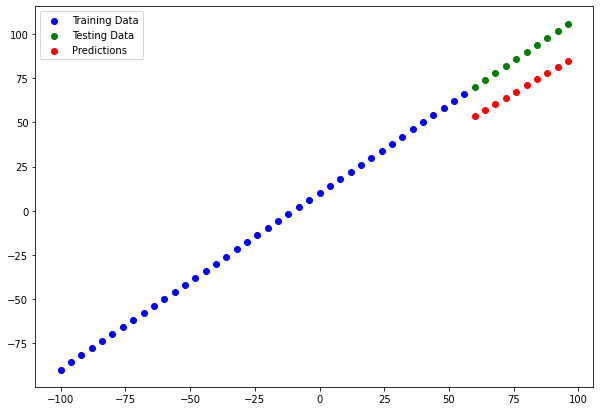

In [51]:
# Make some of the predictions with the model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, predictions=y_preds_1)

In [52]:
tf.constant(y_pred_1), tf.constant(tf.squeeze(y_pred_1))

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[53.57109 ],
        [57.05633 ],
        [60.541573],
        [64.02681 ],
        [67.512054],
        [70.99729 ],
        [74.48254 ],
        [77.96777 ],
        [81.45301 ],
        [84.938255]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32)>)

In [53]:
 # Calculate model_1 evaluation metrics 
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.5734>)

**Build `model_2`** - 2 dense layers trained for 100 epochs

In [54]:
# Let's start building the model_2

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 77.0856 - mse: 8550.2891
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 17.0775 - mse: 458.0874
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 20.1814 - mse: 597.2405
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5192 - mse: 196.8841
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.1468 - mse: 243.6306
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 11.6317 - mse: 154.1265
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.8263 - mse: 216.9939
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2822 - mse: 156.1549
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 41.5593 - mse: 2650.8283
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 27.6300 - mse: 1072.2355
Epoch 11/100
2/2 [============================

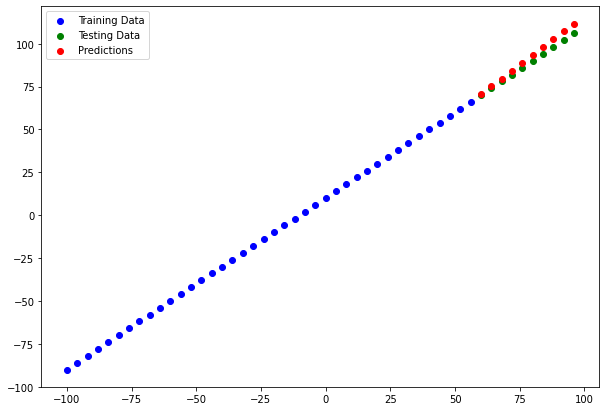

In [55]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions( X_train, y_train, X_test, y_test, y_preds_2)

In [56]:
# Calculate the evaluation metrics of the model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109796>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.496952>)

**Build `model_3`** -  2 layers trained for 500 epochs.


In [57]:
# Now let's create the model_3

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 9ms/step - loss: 21.2489 - mse: 653.0997
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 22.0002 - mse: 620.4684
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.6942 - mse: 1249.1231
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 23.1934 - mse: 776.0347
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 13.3640 - mse: 211.7620
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0209 - mse: 131.9093
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 12.1214 - mse: 180.7038
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 10.9356 - mse: 134.0940
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 38.9254 - mse: 2297.2700
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.3178 - mse: 898.7646
Epoch 11/500
2/2 [=============================

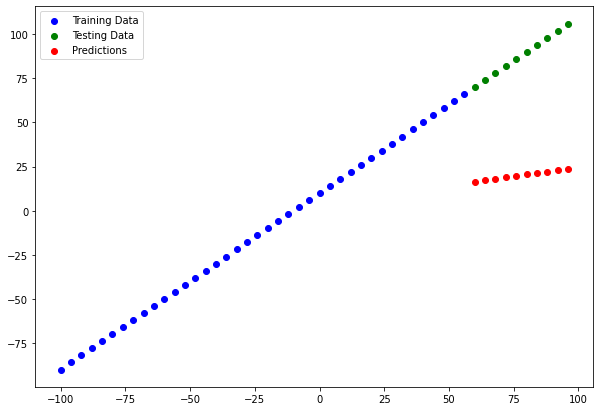

In [58]:
# Make the plot_predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)

In [59]:
# Calculating the evaluation of model_3
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.90955>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4696.0615>)

***Note:*** *You want to start with small expirements (small models) and make sure they work and then increase their scale when necessary.*

## Comparing the results of our expirements

We've run a few expirements, let's compare the results.

In [62]:
# Let's compare our model's results using the pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model_1", "mae", "mse"])
all_results

,model_1,mae,mse
0,model_1,18.745327,353.573395
1,model_2,3.110980,12.496952
2,model_3,67.909554,4696.061523


Looks like the `model_2` performed the best

In [66]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


***Note:*** One of your main goals should be to minimize the time between your expirements. Thbere more expirements you do the more things you'll figure-out which doen't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "EXPIREMENT, Expirement, expirement".

## Tracking your expirements

One really good habit in machine learning modelling is to track the results of your expirements.

And when doing so, it can be tedious if you're running lots of expirements.

Luckily, there are tools to help us!


**Resources:** As you build more model you'll want to look into using:

- **TensorBoard** - A component of TensorFlow libarary to help track modelling expirements.
- **Weights & Biases** - A tool for tracking all kinds of machine learning expirements (plugs straight into TensorBoard). 

## Saving our models
 
Saving the models allows us to use them outside of the Google Colab (or wherever they were trained) such as in web application or a mobile app.

There are two main formats we can save our model's too: 

1. The SavedModel format
2. The HDF5 format

In [67]:
# Save the model using the SavedModel format
model_2.save("best_model_SavedModel_format")   

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [68]:
#  Save the model using the HDF5 Foramt
model_2.save("best_model_HDF5_format.h5")

## Loading in the saved model



In [74]:
# Load in the SavedModel format model 
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [78]:
# Compare the MAE preds of model_2_preds and the SavedModel_preds
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [79]:
model_2_preds.squeeze()

array([ 70.48062 ,  75.06515 ,  79.64967 ,  84.2342  ,  88.81872 ,
        93.40323 ,  97.98777 , 102.57229 , 107.156815, 111.74133 ],
      dtype=float32)

In [82]:
loaded_SavedModel_foramt_preds.squeeze()

array([ 70.48062 ,  75.06515 ,  79.64967 ,  84.2342  ,  88.81872 ,
        93.40323 ,  97.98777 , 102.57229 , 107.156815, 111.74133 ],
      dtype=float32)

In [83]:
# Load in the model using the .h5 foramt
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [84]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files form the google colab: 

1. You can go to the "files" tab and right click on the file you're after and click "Downlaod".
2. Use code (see the cell below)
3. Save it to the Google Drive by connecting Google Drive and copying it there. (see 2nd code cell below)


In [ ]:
# # Download the file from Google Colab
# from google.colab import files
# files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# # Save a file from Google Colab to Google Drive (requires mounting the googel Drive )
# !cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Learning 

In [ ]:
#  !ls /content/drive/MyDrive/Learning